In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox

### Overview do dataset Requests - Parte 1

In [2]:
df_requests = pd.read_excel('Dataset Case - Processo Seletivo NeoSolar.xlsx', sheet_name='Requests')

In [3]:
df_requests.sample(5)

,Customer Country/Region,Issue Code 1,Service Request Id,Valid Data ?,Support Channel,Time To Close
152918,United States,Billing & Payments,1308672884,False,Inbound call,0.0
95165,Morocco,Billing & Payments,1296044318,True,Chat,10.0
120311,Brazil,Misroute,1301626897,False,Chat,2.0
31152,Brazil,Billing & Payments,1284301808,False,Inbound call,0.0
87919,United States,New Advertiser or New Account,1294664583,False,Inbound call,0.0


In [4]:
df_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218685 entries, 0 to 218684
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer Country/Region  218685 non-null  object 
 1   Issue Code 1             218685 non-null  object 
 2   Service Request Id       218685 non-null  int64  
 3   Valid Data ?             218685 non-null  bool   
 4   Support Channel          218668 non-null  object 
 5   Time To Close            218609 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [5]:
df_requests['Issue Code 1'].value_counts()

Billing & Payments                            52469
Poor / No Performance                         19638
Dropped Contact / Insufficient Information    19403
Editorial                                     19245
Tools                                         17538
Misroute                                      17224
Ad and Keyword Management                     16240
Campaign and Ad Group Settings                12876
New Advertiser or New Account                 10587
Account Access                                 8616
Product Ads /  Shopping Campaigns              5084
Reports and Data                               4139
Requests to delete / reactivate account        3728
Agency Management                              3639
Invalid Clicks or Leads                        2431
Campaign Management                            1964
Unknown charges                                1450
Account and Service Level Changes               643
Accreditation Program                           626
Annotations 

In [6]:
df_requests['Valid Data ?'].value_counts()

False    112952
True     105733
Name: Valid Data ?, dtype: int64

### Dados não convertidos corretamente ('Valid Data ?' == False) - Parte 2

In [7]:
requests_data_false = df_requests[df_requests['Valid Data ?'] == False]

In [8]:
requests_data_false.head(3)

,Customer Country/Region,Issue Code 1,Service Request Id,Valid Data ?,Support Channel,Time To Close
34,United States,Ad and Keyword Management,1278327434,False,Inbound call,0.0
35,United States,Billing & Payments,1278323109,False,Inbound call,0.0
36,United States,Campaign and Ad Group Settings,1278328758,False,Inbound call,0.0


In [9]:
requests_data_false['Time To Close'].describe()

count    112897.000000
mean          3.684872
std           5.944311
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max         131.000000
Name: Time To Close, dtype: float64

In [10]:
requests_data_false.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112952 entries, 34 to 218672
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer Country/Region  112952 non-null  object 
 1   Issue Code 1             112952 non-null  object 
 2   Service Request Id       112952 non-null  int64  
 3   Valid Data ?             112952 non-null  bool   
 4   Support Channel          112938 non-null  object 
 5   Time To Close            112897 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 5.3+ MB


In [11]:
requests_data_false['Issue Code 1 encoded'] = pd.factorize(requests_data_false['Issue Code 1'])[0]

C:\Users\akati\AppData\Local\Temp\ipykernel_21680\1735262101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_data_false['Issue Code 1 encoded'] = pd.factorize(requests_data_false['Issue Code 1'])[0]


In [12]:
requests_data_false['Customer Country/Region encoded'] = pd.factorize(requests_data_false['Customer Country/Region'])[0]

C:\Users\akati\AppData\Local\Temp\ipykernel_21680\1400174890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_data_false['Customer Country/Region encoded'] = pd.factorize(requests_data_false['Customer Country/Region'])[0]


In [13]:
requests_data_false.sample(5)

,Customer Country/Region,Issue Code 1,Service Request Id,Valid Data ?,Support Channel,Time To Close,Issue Code 1 encoded,Customer Country/Region encoded
125263,Italy,Campaign and Ad Group Settings,1302718096,False,Inbound call,0.0,2,23
21308,Germany,Billing & Payments,1282435413,False,Inbound call,8.0,1,3
155618,Germany,Requests to delete / reactivate account,1309236437,False,Chat,0.0,8,3
168745,United States,Account Access,1311934777,False,Inbound call,12.0,5,0
25894,United States,Billing & Payments,1283363554,False,Inbound call,0.0,1,0


In [14]:
requests_data_false.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112952 entries, 34 to 218672
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Customer Country/Region          112952 non-null  object 
 1   Issue Code 1                     112952 non-null  object 
 2   Service Request Id               112952 non-null  int64  
 3   Valid Data ?                     112952 non-null  bool   
 4   Support Channel                  112938 non-null  object 
 5   Time To Close                    112897 non-null  float64
 6   Issue Code 1 encoded             112952 non-null  int64  
 7   Customer Country/Region encoded  112952 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 7.0+ MB


In [15]:
# Contagem de registros por 'Time to close'
requests_data_false['Time To Close'].value_counts().head(10)

0.0    49335
1.0    11964
2.0     6157
3.0     5989
6.0     5488
7.0     5459
4.0     5132
5.0     4907
8.0     3458
9.0     2191
Name: Time To Close, dtype: int64

In [16]:
# Contagem de registros por 'Support Channel'
requests_data_false['Support Channel'].value_counts()

Inbound call    72446
Chat            32541
Email            7951
Name: Support Channel, dtype: int64

In [208]:
requests_data_false['Support Channel'].value_counts(normalize=True) * 100

Inbound call    64.146700
Chat            28.813154
Email            7.040146
Name: Support Channel, dtype: float64

In [17]:
# Contagem de registros por Country'
requests_data_false['Customer Country/Region'].value_counts().head(20)

United States     52245
United Kingdom    13740
Germany            7672
Brazil             6736
France             5478
Hong Kong          3129
Netherlands        3027
India              2997
Spain              2588
Italy              2480
Canada             1709
[No Value]         1579
Mexico             1428
Sweden              782
Argentina           555
Denmark             536
Switzerland         494
Colombia            453
Austria             407
Israel              275
Name: Customer Country/Region, dtype: int64

In [212]:
country_percent = requests_data_false['Customer Country/Region'].value_counts(normalize=True)*100
country_percent.head(20)

United States     46.254161
United Kingdom    12.164459
Germany            6.792266
Brazil             5.963595
France             4.849848
Hong Kong          2.770203
Netherlands        2.679899
India              2.653339
Spain              2.291239
Italy              2.195623
Canada             1.513032
[No Value]         1.397939
Mexico             1.264254
Sweden             0.692329
Argentina          0.491359
Denmark            0.474538
Switzerland        0.437354
Colombia           0.401055
Austria            0.360330
Israel             0.243466
Name: Customer Country/Region, dtype: float64

In [18]:
# Contagem de registros por 'Issue Code 1'
requests_data_false['Issue Code 1'].value_counts().head(20)

Billing & Payments                            26258
Misroute                                      10280
Tools                                          9471
Dropped Contact / Insufficient Information     9163
Ad and Keyword Management                      9124
Poor / No Performance                          8257
Editorial                                      7449
Campaign and Ad Group Settings                 6496
New Advertiser or New Account                  6154
Account Access                                 5074
Product Ads /  Shopping Campaigns              4444
Agency Management                              2206
Reports and Data                               1932
Requests to delete / reactivate account        1815
Invalid Clicks or Leads                        1265
Campaign Management                            1148
Unknown charges                                1078
Account and Service Level Changes               357
Accreditation Program                           292
Annotations 

<Figure size 2000x2000 with 0 Axes>

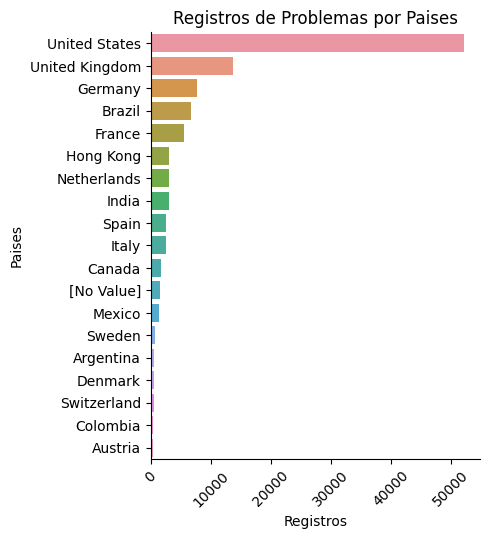

In [172]:
country_counts = requests_data_false['Customer Country/Region'].value_counts().reset_index()
country_counts.columns = ['Customer Country/Region', 'Count']
min_problem_count = 350
filtered_countrys = country_counts[country_counts['Count'] >= min_problem_count]
plt.figure(figsize=(20, 20))
sns.catplot(x='Count', y='Customer Country/Region', kind='bar', data=filtered_countrys)
plt.title('Registros de Problemas por Paises')
plt.xlabel('Registros')
plt.ylabel('Paises')
plt.xticks(rotation=45)
plt.show();

##### Contagem de registros de problemas por pais

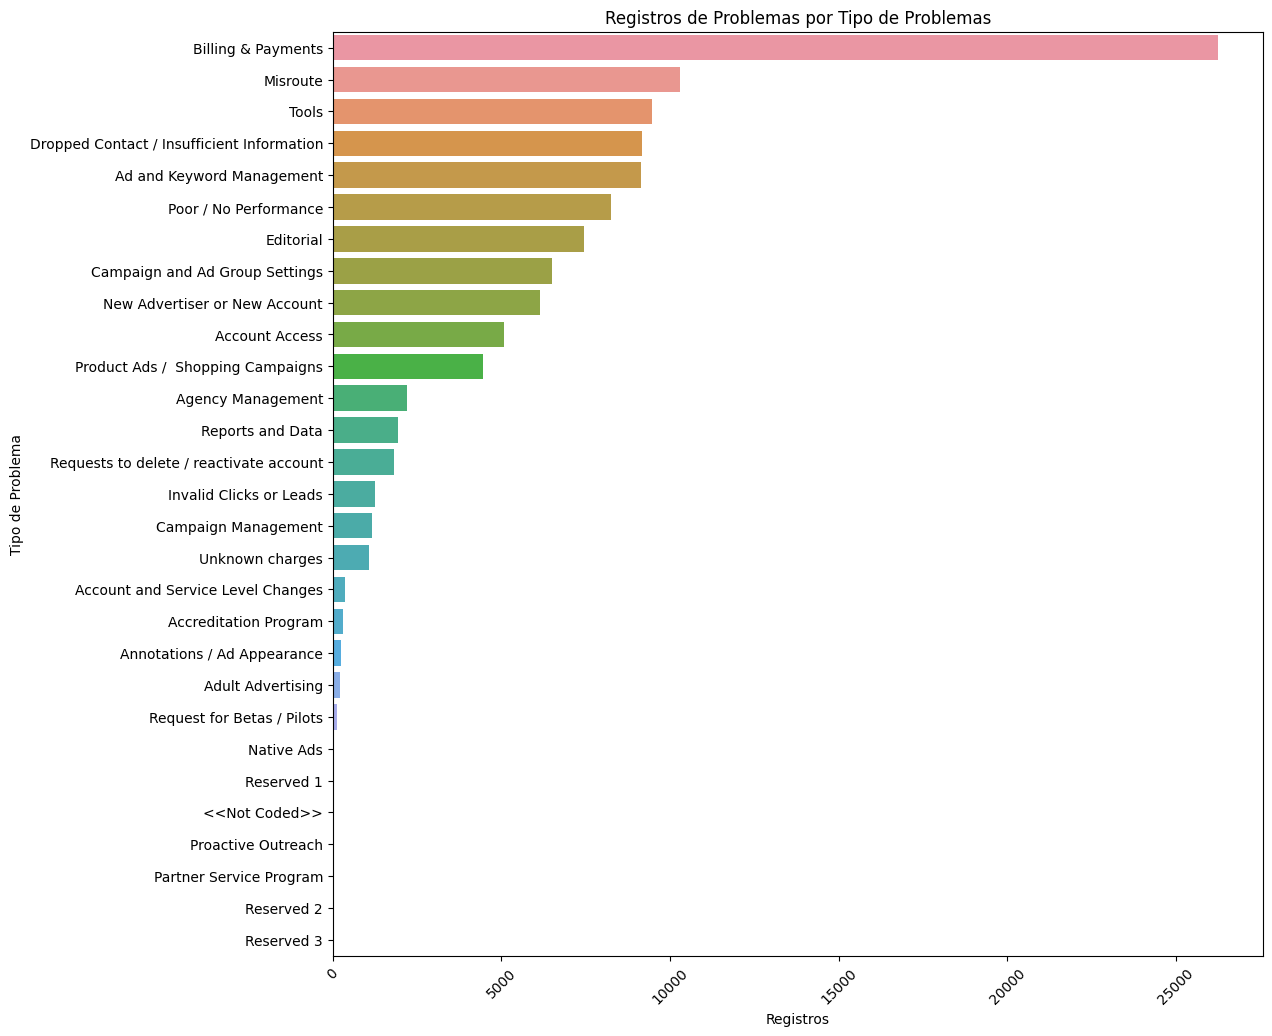

In [173]:
plt.figure(figsize=(12, 12))
sns.countplot(y='Issue Code 1', data = requests_data_false, order=requests_data_false['Issue Code 1'].value_counts(ascending=False).index)
plt.title('Registros de Problemas por Tipo de Problemas')
plt.xlabel('Registros')
plt.ylabel('Tipo de Problema')
plt.xticks(rotation=45)
plt.show()

##### Contagem dos registros de tipos de problemas

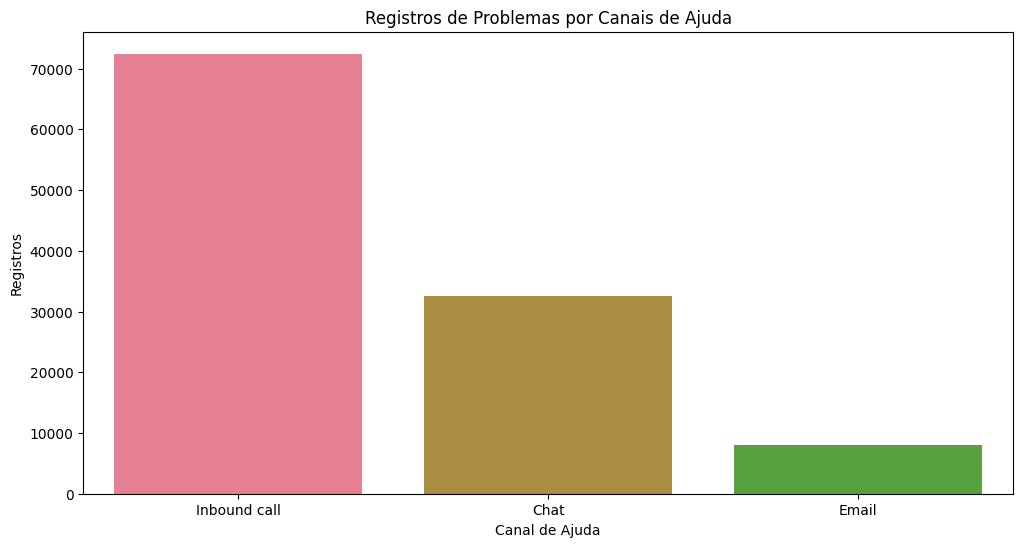

In [174]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Support Channel', data=requests_data_false)
plt.title('Registros de Problemas por Canais de Ajuda')
plt.xlabel('Canal de Ajuda')
plt.ylabel('Registros')
plt.show();

##### Contagem de registros de contato por 'Canal de Ajuda'

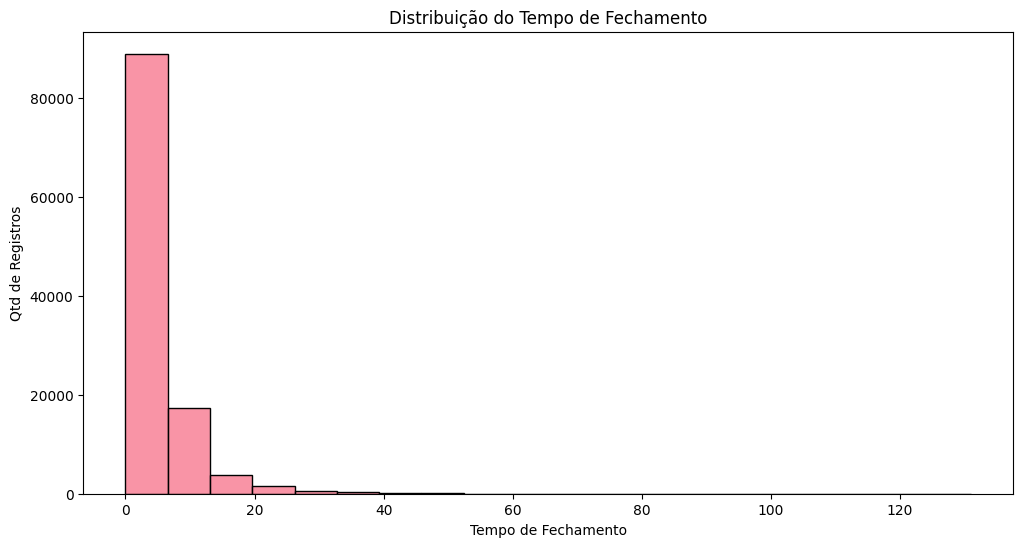

In [175]:
plt.figure(figsize=(12, 6))
sns.histplot(data=requests_data_false, x='Time To Close', bins=20)
plt.title('Distribuição do Tempo de Fechamento')
plt.xlabel('Tempo de Fechamento')
plt.ylabel('Qtd de Registros')
plt.show();

#### Distribuição de registros por 'Tempo para fechamento'

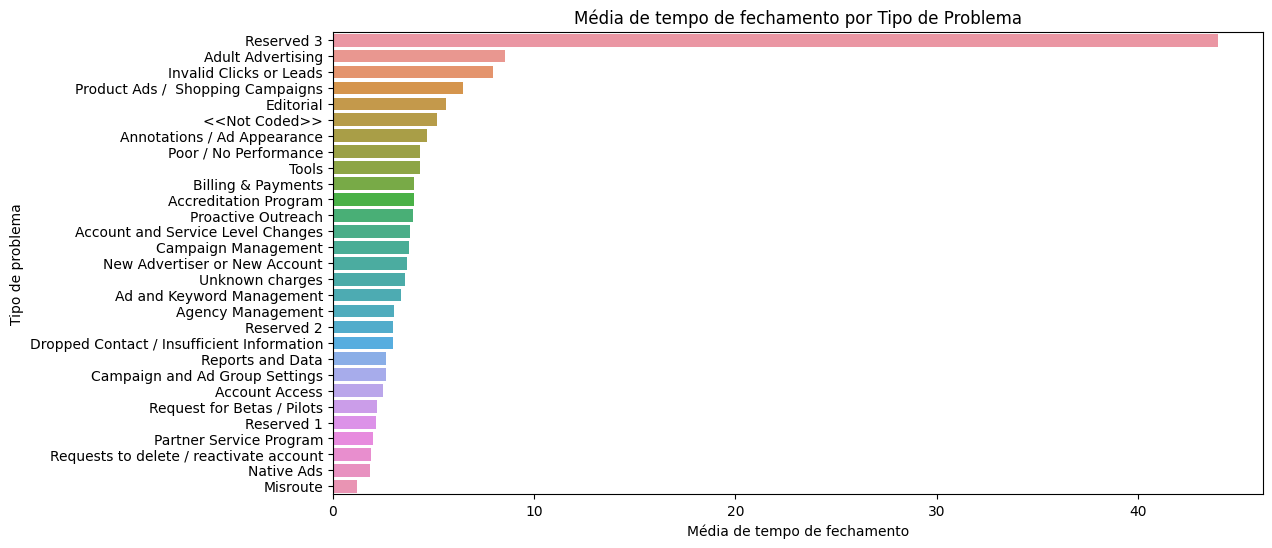

In [176]:
average_time_by_issue = requests_data_false.groupby('Issue Code 1')['Time To Close'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=average_time_by_issue.index, x=average_time_by_issue.values)
plt.title('Média de tempo de fechamento por Tipo de Problema')
plt.xlabel('Média de tempo de fechamento')
plt.ylabel('Tipo de problema')
plt.show();

#### Distribuição de média de tempo de fechamento por tipo de problema. 
#### Notamos uma média muito alta para os registros de problema 'Reserved 3', muito maior que as demais

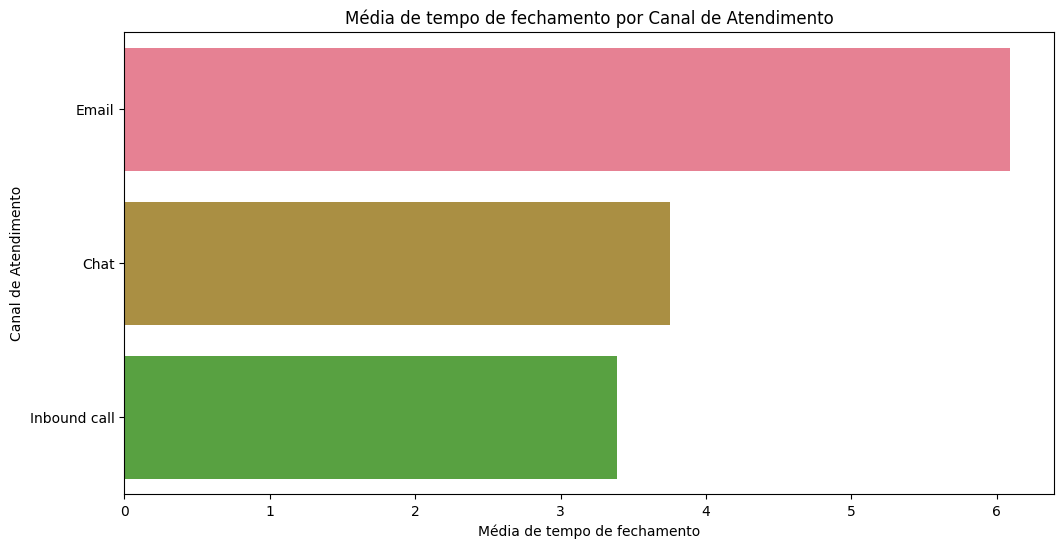

In [177]:
average_time_by_channel = requests_data_false.groupby('Support Channel')['Time To Close'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=average_time_by_channel.index, x=average_time_by_channel.values)
plt.title('Média de tempo de fechamento por Canal de Atendimento')
plt.xlabel('Média de tempo de fechamento')
plt.ylabel('Canal de Atendimento')
plt.show();

#### Média de tempo para fechamento por Canal de Ajuda.

### Overview e Merged com dataset Survey - Parte 3

In [25]:
requests_data_false.count()

Customer Country/Region            112952
Issue Code 1                       112952
Service Request Id                 112952
Valid Data ?                       112952
Support Channel                    112938
Time To Close                      112897
Issue Code 1 encoded               112952
Customer Country/Region encoded    112952
dtype: int64

In [26]:
df_survey = pd.read_excel('Dataset Case - Processo Seletivo NeoSolar.xlsx', sheet_name='Survey')

In [27]:
df_survey.sample(5)

,Is Issue Resolved,ProductQuality 9pt,ProductQuality 9pt act,QualityOfSupport 9pt,QualityOfSupport 9pt act,SR Number
6261,yes,Top Box,9,Top Box,9,1291119205
5117,yes,Top Box,8,Top Box,9,1291707509
6503,yes,Top Box,9,Top Box,9,1295225272
5730,yes,Top Box,9,Top Box,9,1282219430
1040,yes,Bottom Box,4,Middle Box,5,1288667793


In [28]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Is Issue Resolved         7823 non-null   object
 1   ProductQuality 9pt        7823 non-null   object
 2   ProductQuality 9pt act    7823 non-null   object
 3   QualityOfSupport 9pt      7823 non-null   object
 4   QualityOfSupport 9pt act  7823 non-null   int64 
 5   SR Number                 7823 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 366.8+ KB


In [29]:
df_survey['QualityOfSupport 9pt act'].describe()

count    7823.000000
mean        7.920491
std         2.006909
min         1.000000
25%         8.000000
50%         9.000000
75%         9.000000
max         9.000000
Name: QualityOfSupport 9pt act, dtype: float64

### Merge dos Valid Data == False com Survey pelo Service Request ID

In [30]:
df_merge_naoconvertidos_porserial = pd.merge(requests_data_false, df_survey, left_on='Service Request Id', right_on='SR Number')

In [31]:
df_merge_naoconvertidos_porserial.sample(3)

,Customer Country/Region,Issue Code 1,Service Request Id,Valid Data ?,Support Channel,Time To Close,Issue Code 1 encoded,Customer Country/Region encoded,Is Issue Resolved,ProductQuality 9pt,ProductQuality 9pt act,QualityOfSupport 9pt,QualityOfSupport 9pt act,SR Number
3365,United States,Ad and Keyword Management,1320637828,False,Inbound call,3.0,0,0,yes,Top Box,9,Top Box,9,1320637828
2746,United States,Campaign and Ad Group Settings,1310307113,False,Inbound call,0.0,2,0,yes,Bottom Box,2,Middle Box,7,1310307113
3378,Netherlands,New Advertiser or New Account,1320772452,False,Email,0.0,11,4,yes,Top Box,9,Top Box,9,1320772452


In [32]:
df_merge_naoconvertidos_porserial['Is Issue Resolved encoded'] = pd.factorize(df_merge_naoconvertidos_porserial['Is Issue Resolved'])[0]

In [71]:
df_merge_naoconvertidos_porserial['ProductQuality 9pt act encoded'] = pd.Categorical(df_merge_naoconvertidos_porserial['ProductQuality 9pt act']).codes
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "Don't know/refused", 'ProductQuality 9pt act encoded'] = 10
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "9", 'ProductQuality 9pt act encoded'] = 9
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "8", 'ProductQuality 9pt act encoded'] = 8
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "7", 'ProductQuality 9pt act encoded'] = 7
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "6", 'ProductQuality 9pt act encoded'] = 6
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "5", 'ProductQuality 9pt act encoded'] = 5
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "4", 'ProductQuality 9pt act encoded'] = 4
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "3", 'ProductQuality 9pt act encoded'] = 3
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "2", 'ProductQuality 9pt act encoded'] = 2
df_merge_naoconvertidos_porserial.loc[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "1", 'ProductQuality 9pt act encoded'] = 1

In [76]:
df_merge_naoconvertidos_porserial.sample(3)

,Customer Country/Region,Issue Code 1,Service Request Id,Valid Data ?,Support Channel,Time To Close,Issue Code 1 encoded,Customer Country/Region encoded,Is Issue Resolved,ProductQuality 9pt,ProductQuality 9pt act,QualityOfSupport 9pt,QualityOfSupport 9pt act,SR Number,Is Issue Resolved encoded,ProductQuality 9pt act encoded
1599,United States,New Advertiser or New Account,1294181097,False,Inbound call,0.0,11,0,yes,Top Box,9,Top Box,9,1294181097,1,8
2373,Germany,Editorial,1304870710,False,Email,4.0,7,3,yes,Middle Box,7,Middle Box,7,1304870710,1,6
3442,United States,New Advertiser or New Account,1321715083,False,Inbound call,0.0,11,0,yes,Don't know/refused,Don't know/refused,Top Box,9,1321715083,1,10


In [77]:
df_merge_naoconvertidos_porserial['ProductQuality 9pt act'].unique()

array([3, 5, 7, 9, 6, "Don't know/refused", 8, 4, 2, 1], dtype=object)

In [200]:
# Média de ProductQuality

df_numeric = df_merge_naoconvertidos_porserial[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'].apply(lambda x: isinstance(x, (int, float)))]
df_numeric['ProductQuality 9pt act'].mean()

7.124780316344464

In [201]:
df_merge_naoconvertidos_porserial['QualityOfSupport 9pt act'].mean()

8.064722222222223

In [78]:
df_merge_naoconvertidos_porserial['ProductQuality 9pt act encoded'].unique()

array([ 2,  4,  6,  8,  5, 10,  7,  3,  1,  0], dtype=int8)

In [203]:
df_merge_naoconvertidos_porserial['Time To Close'].describe()

count    3600.00000
mean        4.13000
std         6.29181
min         0.00000
25%         0.00000
50%         2.00000
75%         6.00000
max        92.00000
Name: Time To Close, dtype: float64

In [79]:
df_merge_naoconvertidos_porserial.count()

Customer Country/Region            3600
Issue Code 1                       3600
Service Request Id                 3600
Valid Data ?                       3600
Support Channel                    3600
Time To Close                      3600
Issue Code 1 encoded               3600
Customer Country/Region encoded    3600
Is Issue Resolved                  3600
ProductQuality 9pt                 3600
ProductQuality 9pt act             3600
QualityOfSupport 9pt               3600
QualityOfSupport 9pt act           3600
SR Number                          3600
Is Issue Resolved encoded          3600
ProductQuality 9pt act encoded     3600
dtype: int64

In [80]:
df_merge_naoconvertidos_porserial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 0 to 3599
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer Country/Region          3600 non-null   object 
 1   Issue Code 1                     3600 non-null   object 
 2   Service Request Id               3600 non-null   int64  
 3   Valid Data ?                     3600 non-null   bool   
 4   Support Channel                  3600 non-null   object 
 5   Time To Close                    3600 non-null   float64
 6   Issue Code 1 encoded             3600 non-null   int64  
 7   Customer Country/Region encoded  3600 non-null   int64  
 8   Is Issue Resolved                3600 non-null   object 
 9   ProductQuality 9pt               3600 non-null   object 
 10  ProductQuality 9pt act           3600 non-null   object 
 11  QualityOfSupport 9pt             3600 non-null   object 
 12  QualityOfSupport 9pt

In [81]:
df_merge_naoconvertidos_porserial['ProductQuality 9pt act'].unique()

array([3, 5, 7, 9, 6, "Don't know/refused", 8, 4, 2, 1], dtype=object)

In [82]:
df_merge_naoconvertidos_porserial['ProductQuality 9pt act'].value_counts()

9                     1100
7                      697
8                      678
6                      320
5                      264
Don't know/refused     186
1                      113
4                       98
3                       88
2                       56
Name: ProductQuality 9pt act, dtype: int64

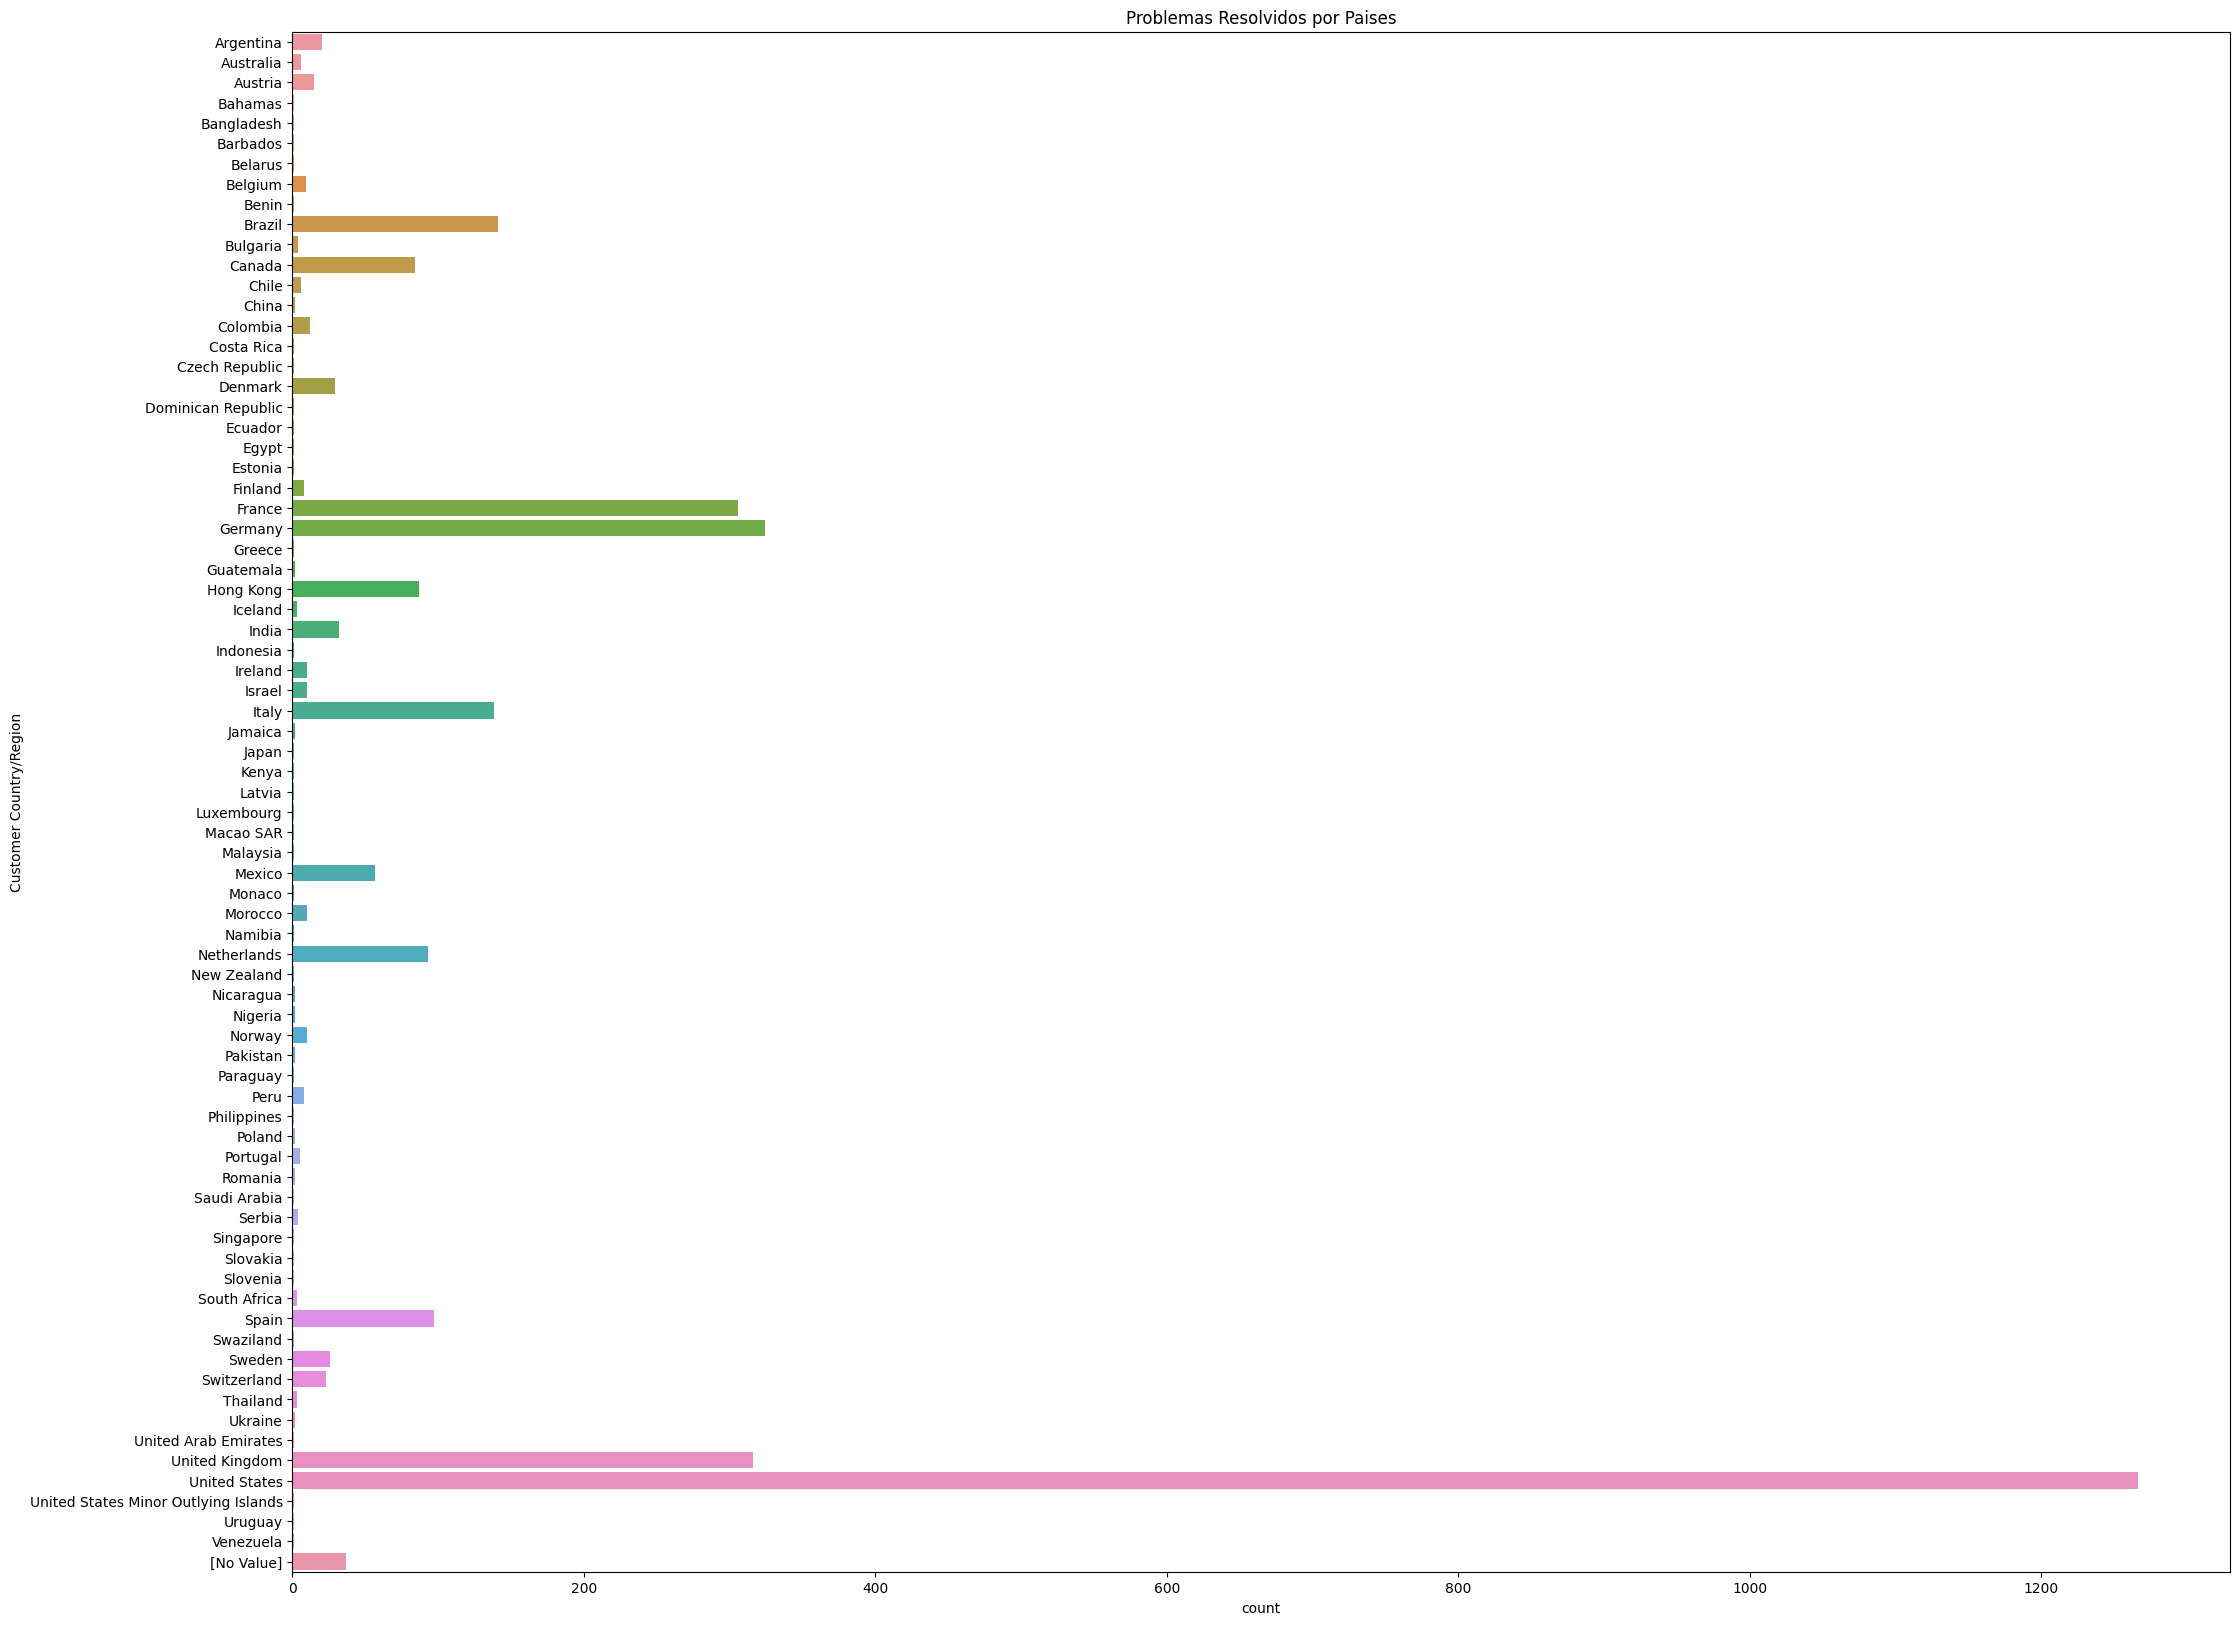

In [179]:
df_agrupado = df_merge_naoconvertidos_porserial.groupby(['Customer Country/Region', 'Is Issue Resolved encoded']).size().reset_index(name='count')
df_resolved = df_agrupado[df_agrupado['Is Issue Resolved encoded'] == 1]
plt.figure(figsize=(25,20))
plt.title('Problemas Resolvidos por Paises')
sns.barplot(data=df_resolved, y='Customer Country/Region', x='count')
plt.show();

##### Quantidade de problemas resolvidos por pais.

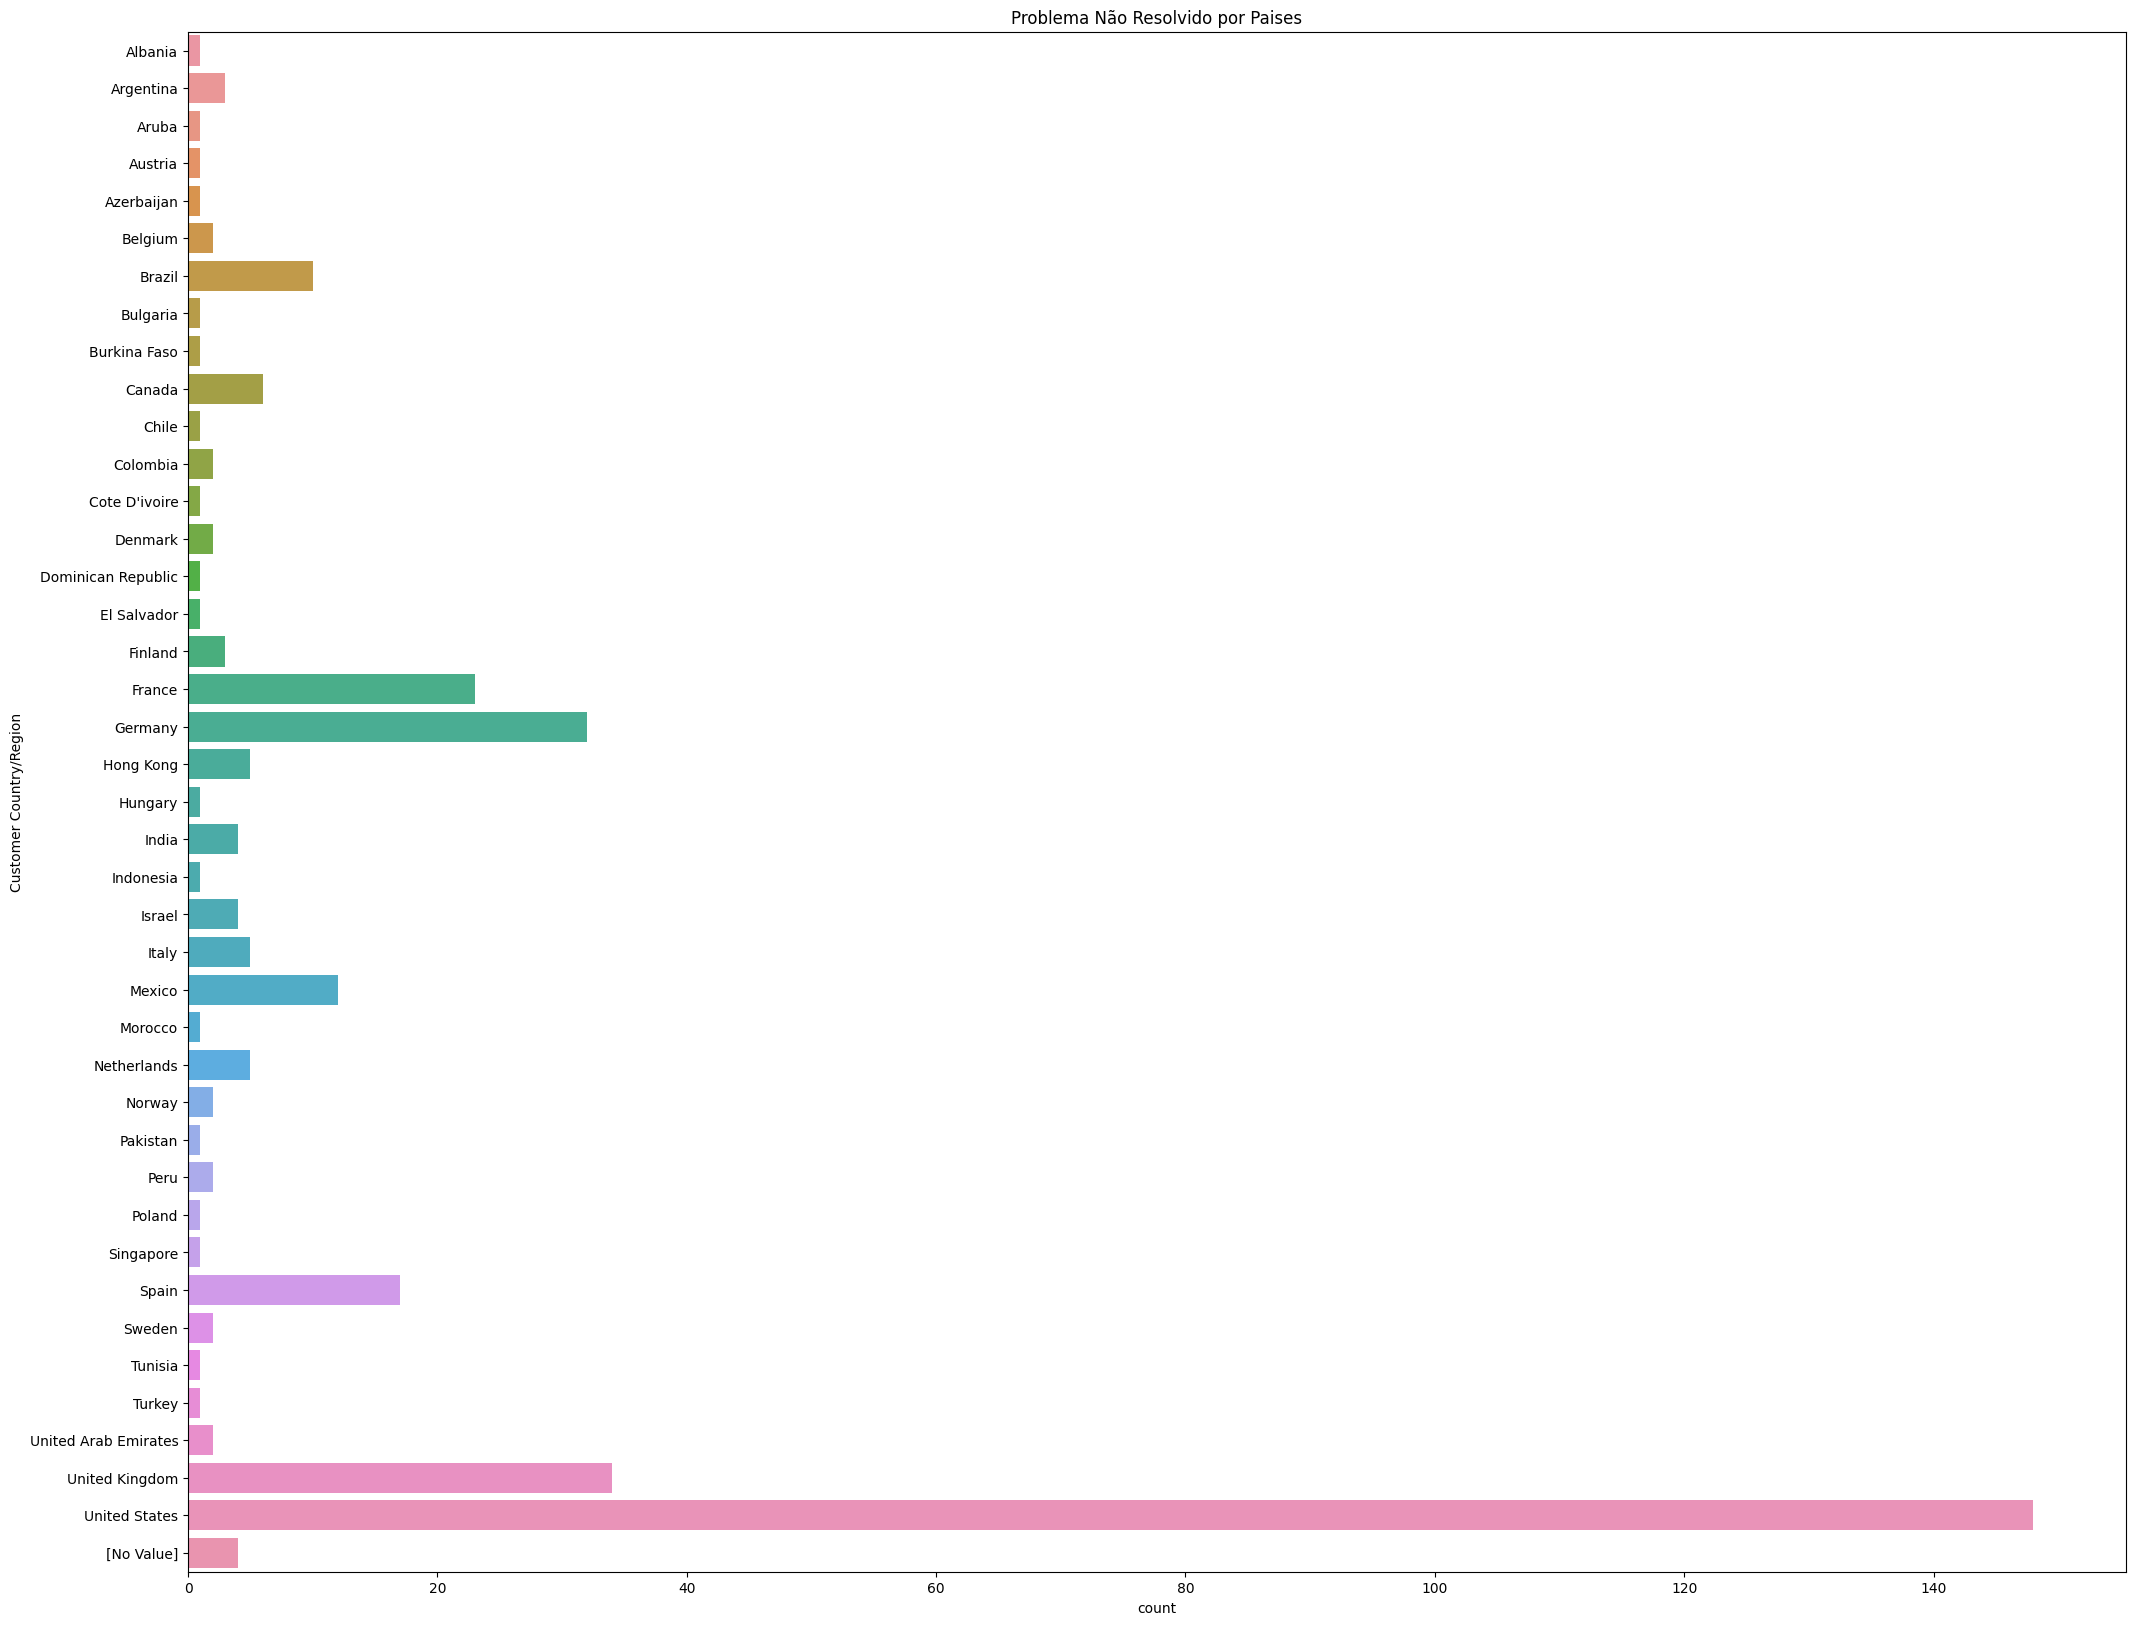

In [181]:
df_agrupado = df_merge_naoconvertidos_porserial.groupby(['Customer Country/Region', 'Is Issue Resolved encoded']).size().reset_index(name='count')
df_resolved = df_agrupado[df_agrupado['Is Issue Resolved encoded'] == 0]
plt.figure(figsize=(25,20))
plt.title('Problema Não Resolvido por Paises')
sns.barplot(data=df_resolved, y='Customer Country/Region', x='count')
plt.show();

##### Quantidade de problemas não resolvidos por pais. Notamos que a proporcionalmente parecida com o gráfico dos 'resolvidos'.

Text(0.5, 1.0, 'Problemas Resolvidos por Tipo de Problema')

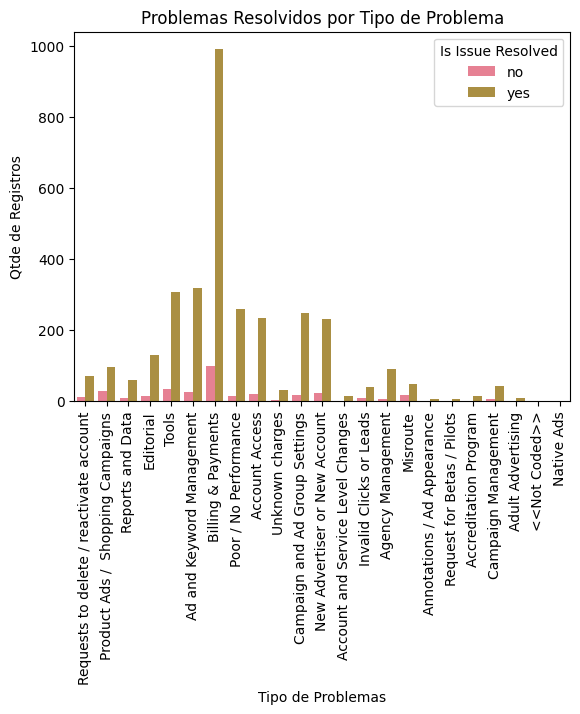

In [182]:
sns.countplot(x='Issue Code 1', hue='Is Issue Resolved', data=df_merge_naoconvertidos_porserial)
plt.xticks(rotation=90)
plt.xlabel('Tipo de Problemas')
plt.ylabel('Qtde de Registros')
plt.title('Problemas Resolvidos por Tipo de Problema')

##### Problemas resolvidos por 'problema' (Issue Code 1)
###### Notamos que a maior quantidade de problemas resolvidos e não resolvidos são problemas relacionados a 'fatura e pagamentos', porem os resolvidos em quantidade muito supeior. Um pequeno detalhe é o Issue Code 'Product Ads / Shopping Campaings' e o 'Misroute, não representam volumes muito grandes mas são os que tem menores diferenças entre resolvidos / não resolvidos proporcionalmente. 

Text(0.5, 1.0, 'Problemas Resolvidos por Canal de Atendimento')

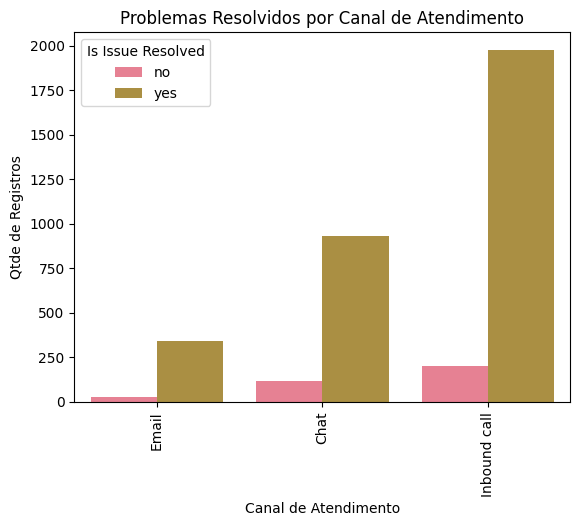

In [183]:
sns.countplot(x='Support Channel', hue='Is Issue Resolved', data=df_merge_naoconvertidos_porserial)
plt.xticks(rotation=90)
plt.xlabel('Canal de Atendimento')
plt.ylabel('Qtde de Registros')
plt.title('Problemas Resolvidos por Canal de Atendimento')

##### Problemas resolvidos por canais de suporte

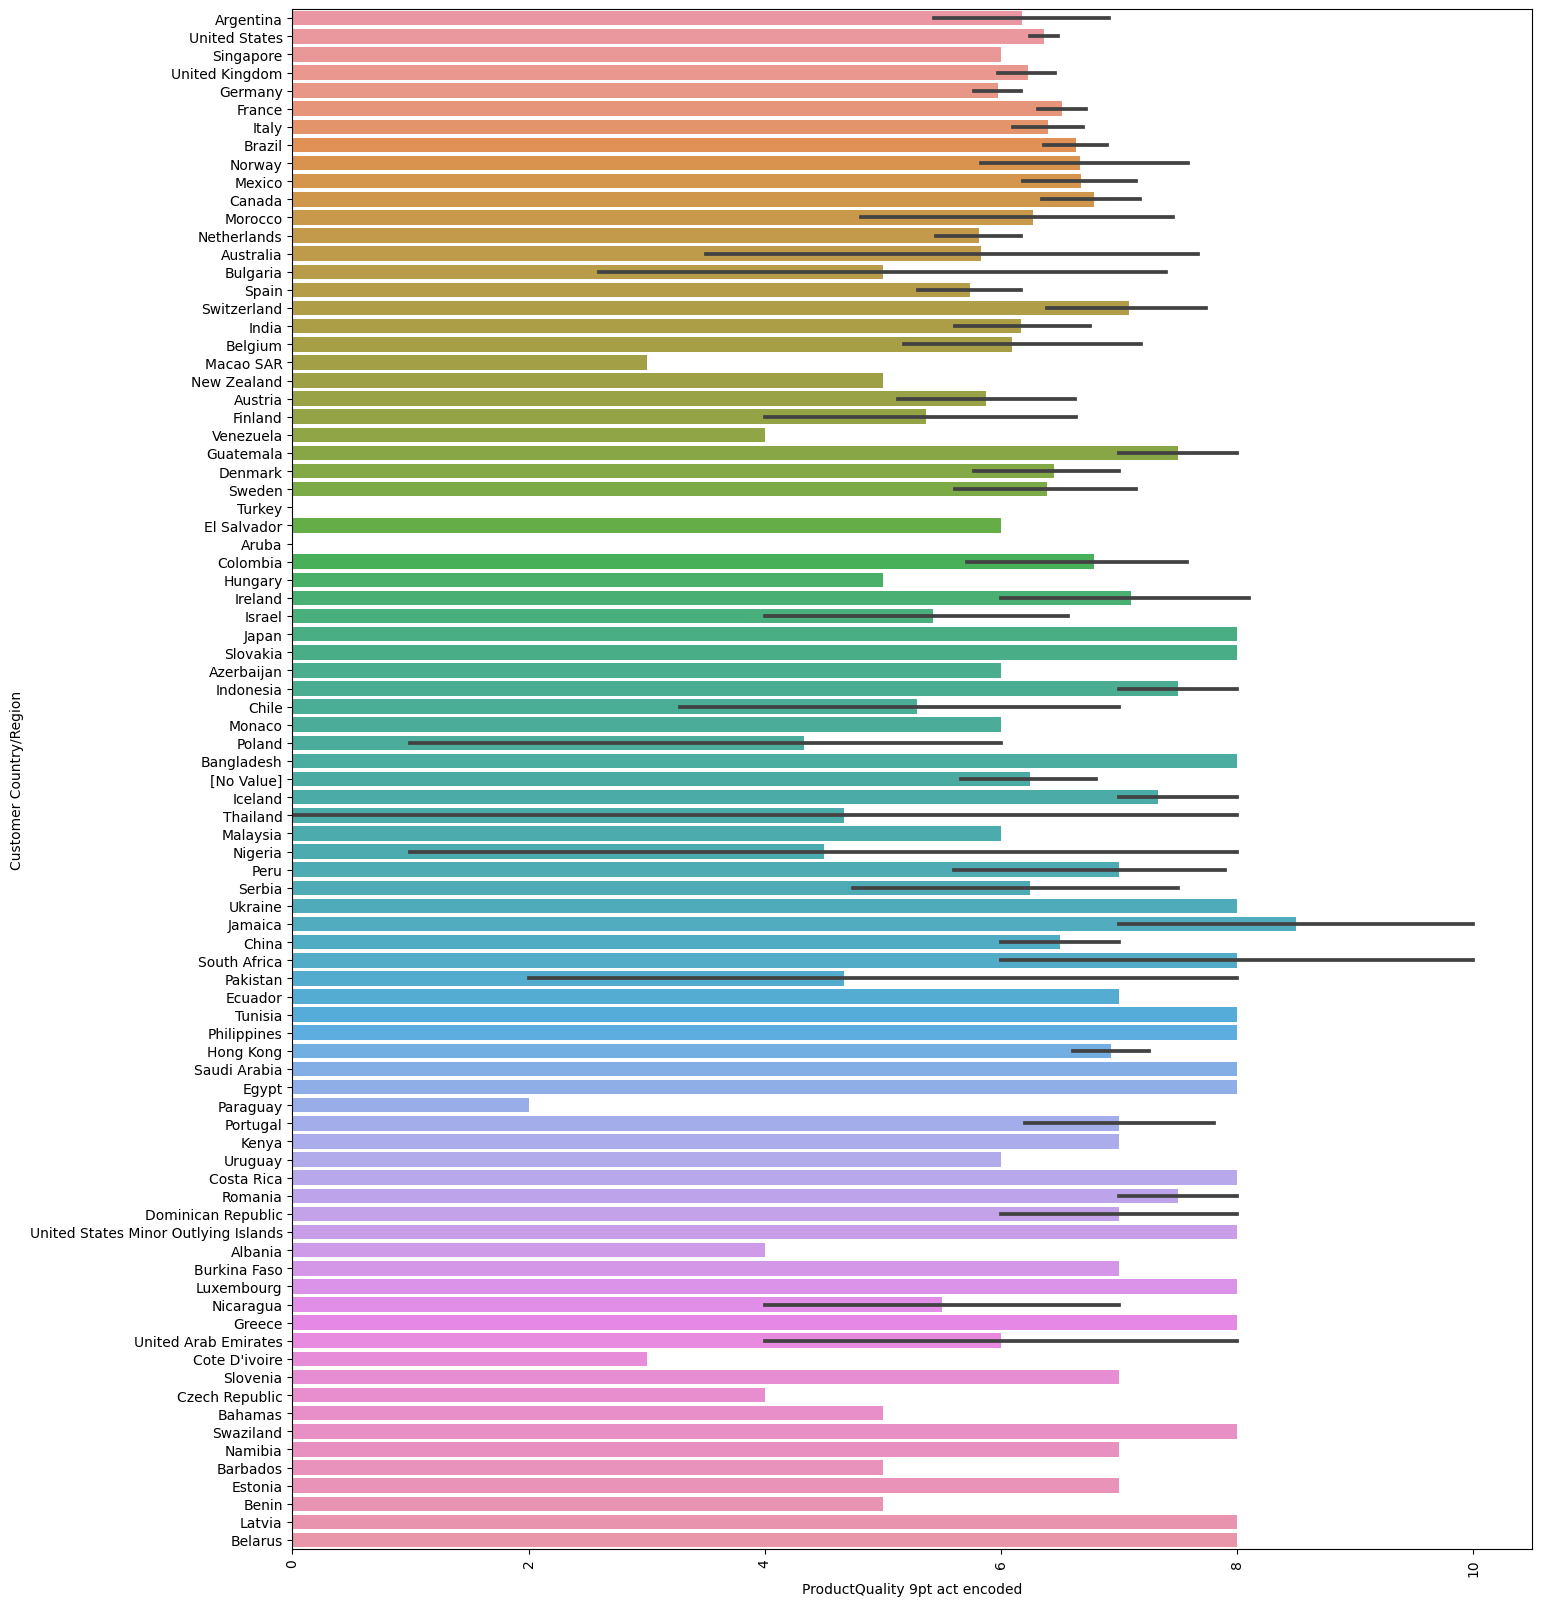

In [89]:
plt.figure(figsize=(16, 20))
sns.barplot(x='ProductQuality 9pt act encoded', y='Customer Country/Region', data=df_merge_naoconvertidos_porserial)
plt.xticks(rotation=90)
plt.show();

##### Média de pontuação de qualidade de produto por país

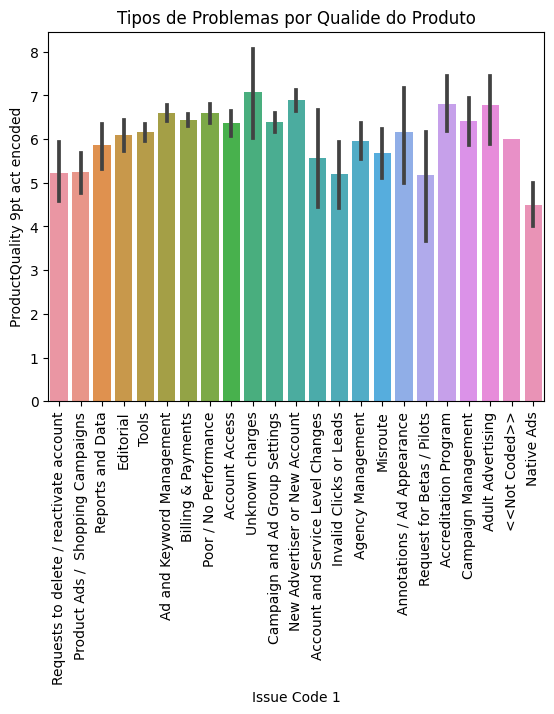

In [184]:
sns.barplot(x='Issue Code 1', y='ProductQuality 9pt act encoded', data=df_merge_naoconvertidos_porserial)
plt.title('Tipos de Problemas por Qualide do Produto')
plt.xticks(rotation=90)
plt.show();

##### Este gráfico de barras acima mostra a média da pontuação de qualidade de 'produto' para cada 'problema' (Issue Code 1).
###### Temos uma média de pontuação muito baixa para 'Native Ads', na sequencia 'Request for betas', 'Invalid clicks', 'Requests to delete' e 'Product ads'

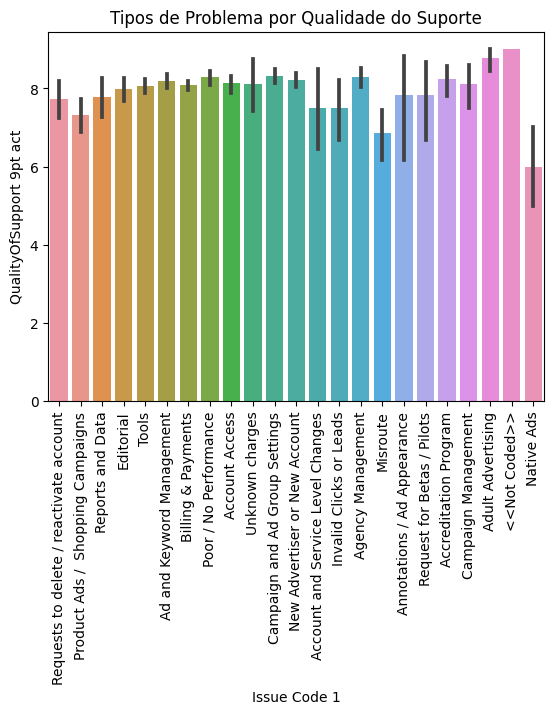

In [185]:
sns.barplot(x='Issue Code 1', y='QualityOfSupport 9pt act', data=df_merge_naoconvertidos_porserial)
plt.title('Tipos de Problema por Qualidade do Suporte')
plt.xticks(rotation=90)
plt.show();

##### Novamente temos ume média de pontuação de qualidade de suporte para o problema 'Native Ads', na sequência temos 'Misroute' (Mal encaminhado).

<Axes: xlabel='ProductQuality 9pt act encoded', ylabel='Count'>

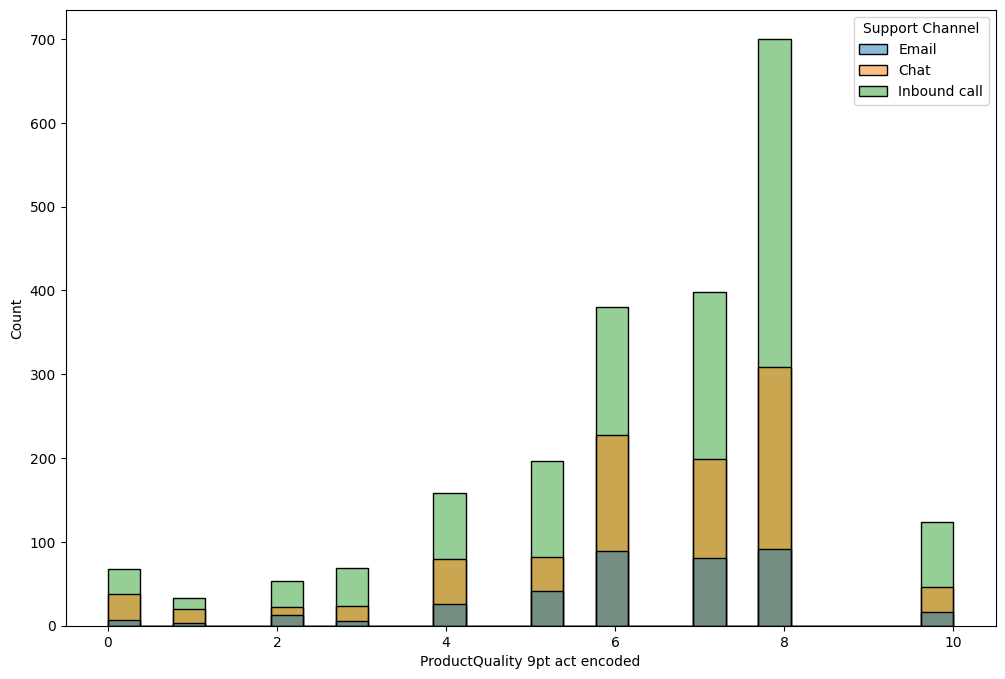

In [126]:
plt.figure(figsize=(12, 8))
sns.histplot(x='ProductQuality 9pt act encoded', hue='Support Channel', data=df_merge_naoconvertidos_porserial)

#### Relação de pontuação de qualidade de 'Produto' por 'Canal de Ajuda'

<Axes: xlabel='QualityOfSupport 9pt act', ylabel='Count'>

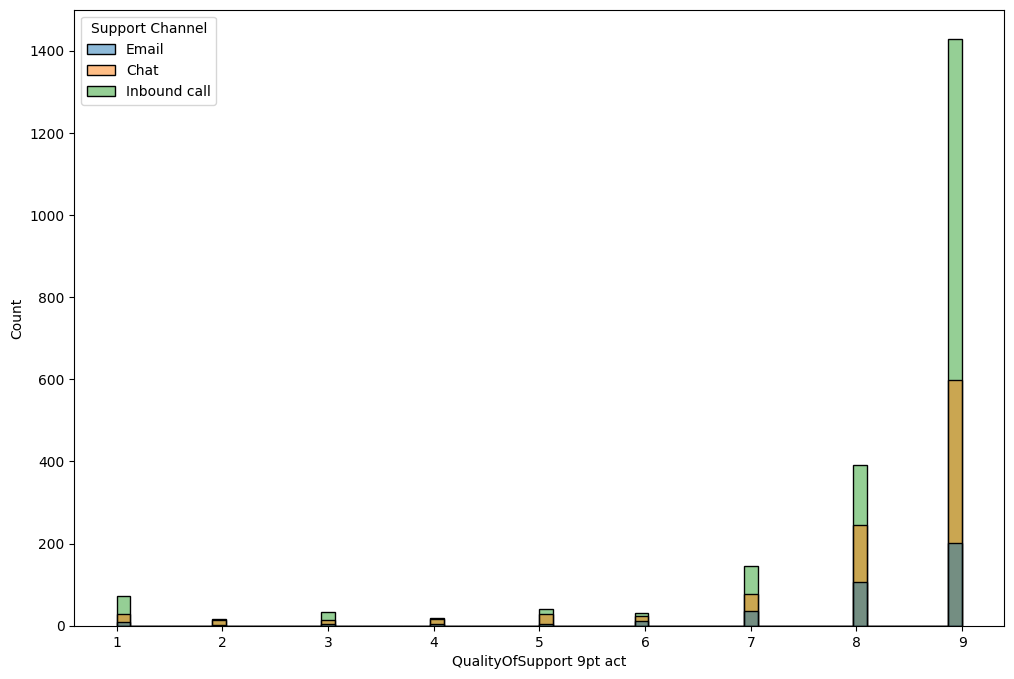

In [128]:
plt.figure(figsize=(12, 8))
sns.histplot(x='QualityOfSupport 9pt act', hue='Support Channel', data=df_merge_naoconvertidos_porserial)

#### Relação de pontuação de qualidade de 'Suporte' por 'Canal de Ajuda'

<Figure size 1000x600 with 0 Axes>

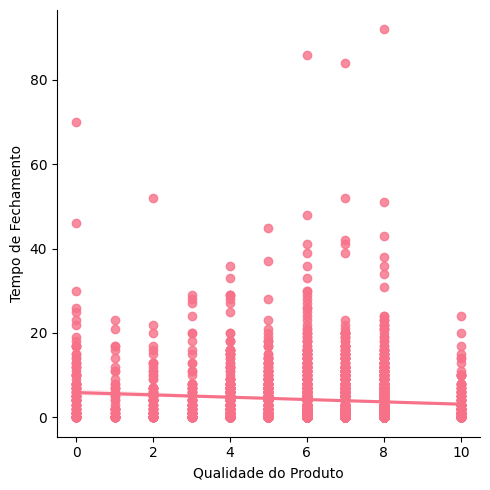

In [186]:
plt.figure(figsize=(10, 6))
sns.lmplot(y='Time To Close', x='ProductQuality 9pt act encoded', data=df_merge_naoconvertidos_porserial)
plt.ylabel('Tempo de Fechamento')
plt.xlabel('Qualidade do Produto')
plt.show();

<Figure size 1000x600 with 0 Axes>

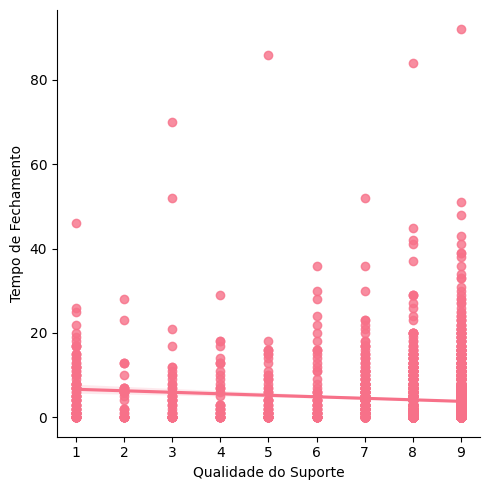

In [187]:
plt.figure(figsize=(10, 6))
sns.lmplot(y='Time To Close', x='QualityOfSupport 9pt act', data=df_merge_naoconvertidos_porserial)
plt.ylabel('Tempo de Fechamento')
plt.xlabel('Qualidade do Suporte')
plt.show();

#### Tanto Avaliação de Produto quanto Suporte, não tem uma relação linear com 'Tempo de Fechamento'.
##### Não podemos dizer que quanto menos tempo maior a pontuação ou vice-versa

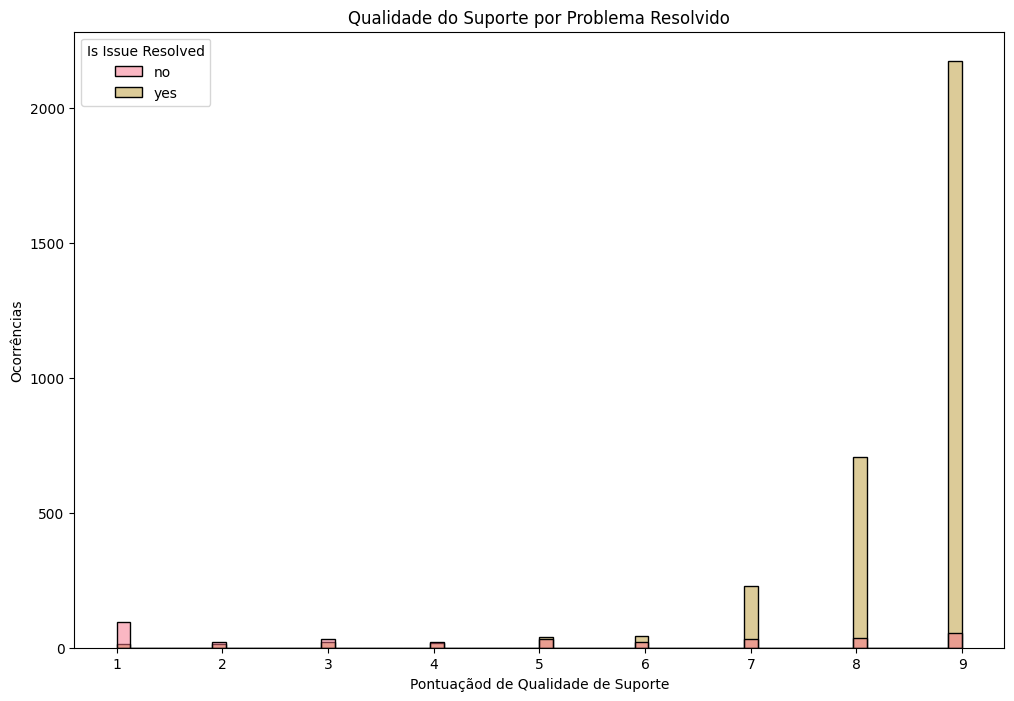

In [149]:
plt.figure(figsize=(12, 8))
sns.histplot(hue='Is Issue Resolved', x='QualityOfSupport 9pt act', data=df_merge_naoconvertidos_porserial)
plt.xlabel('Pontuaçãod de Qualidade de Suporte')
plt.ylabel('Ocorrências')
plt.title('Qualidade do Suporte por Problema Resolvido')
plt.show();

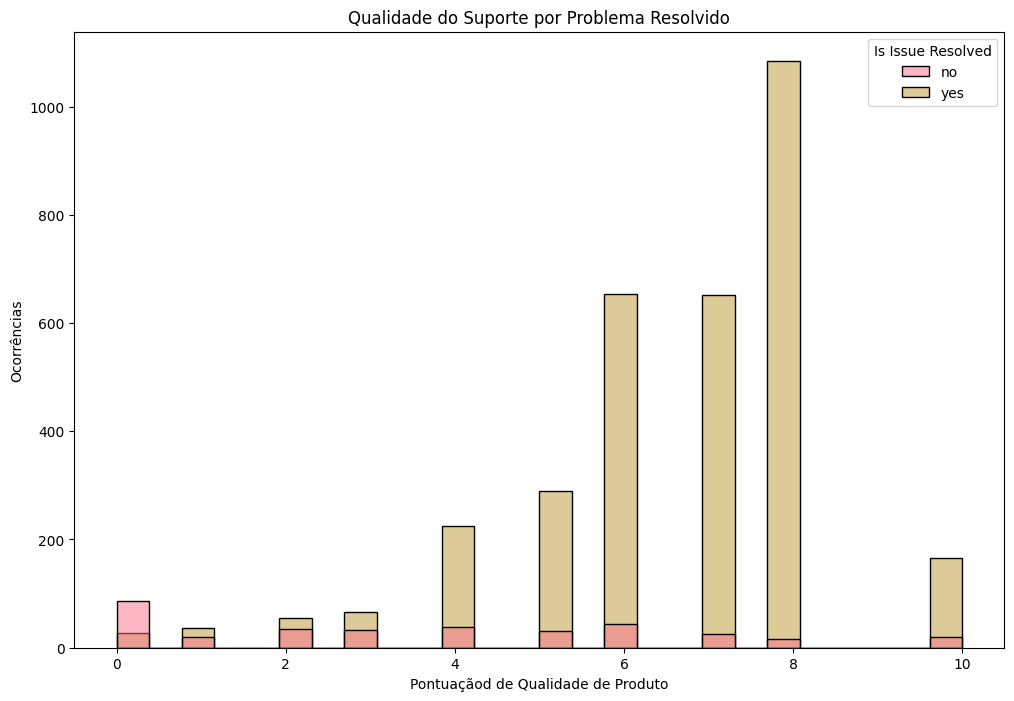

In [150]:
plt.figure(figsize=(12, 8))
sns.histplot(hue='Is Issue Resolved', x='ProductQuality 9pt act encoded', data=df_merge_naoconvertidos_porserial)
plt.xlabel('Pontuaçãod de Qualidade de Produto')
plt.ylabel('Ocorrências')
plt.title('Qualidade do Suporte por Problema Resolvido')
plt.show();

##### Acima vemos as ocorrências de pontuação de qualidade de Suporte e Produto por Problemas Resolvidos ou Não. 
##### Notamos que grande parte dos Problemas não Resolvidos ganham nota mínima.

<Axes: >

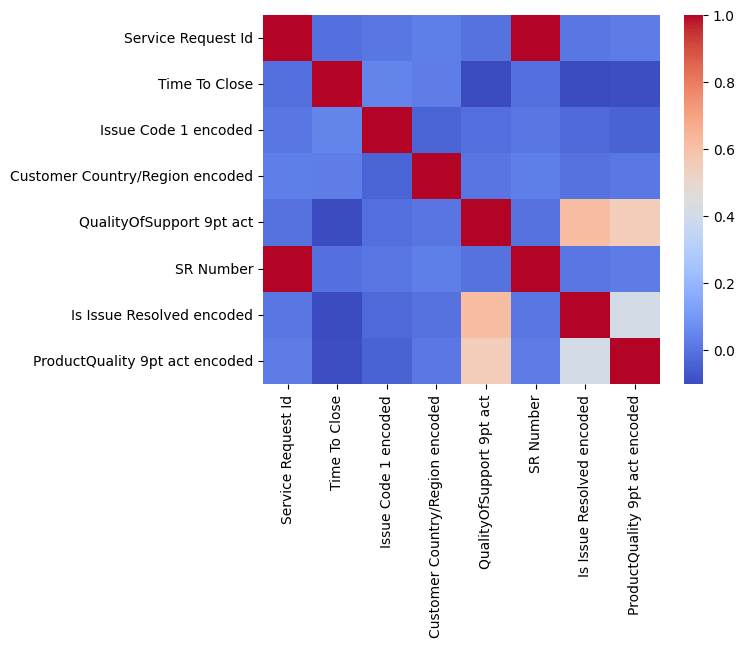

In [116]:
df_numeric = df_merge_naoconvertidos_porserial.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), cmap='coolwarm')

##### Gráfico de calor para Relação Linear entre as colunas.
##### Notamos que existe uma média relação entre as Avaliações de Produto e Suporte por 'Problema Resolvido', isso se deve ao fato de que quando o problema é solucionado a nota é alta, quando é o contrário tende a nota ser baixa.
##### A outra relação muito alta é entre as colunas de SR Number e Service ID, que são os mesmo registros porem em datasets diferentes.

### Somente os registros que possuem valor de "Don't Know/Refused" em 'ProductQuality 9pt act'

In [96]:
df_merge_naoconvertidos_porserial_refused = df_merge_naoconvertidos_porserial[df_merge_naoconvertidos_porserial['ProductQuality 9pt act'] == "Don't know/refused"]

In [97]:
df_merge_naoconvertidos_porserial_refused.sample(3)

,Customer Country/Region,Issue Code 1,Service Request Id,Valid Data ?,Support Channel,Time To Close,Issue Code 1 encoded,Customer Country/Region encoded,Is Issue Resolved,ProductQuality 9pt,ProductQuality 9pt act,QualityOfSupport 9pt,QualityOfSupport 9pt act,SR Number,Is Issue Resolved encoded,ProductQuality 9pt act encoded
2577,Canada,Billing & Payments,1307848519,False,Inbound call,0.0,1,6,yes,Don't know/refused,Don't know/refused,Top Box,9,1307848519,1,10
3488,United States,Billing & Payments,1322338451,False,Inbound call,0.0,1,0,yes,Don't know/refused,Don't know/refused,Top Box,9,1322338451,1,10
3599,Denmark,Unknown charges,1324688252,False,Inbound call,0.0,16,17,yes,Don't know/refused,Don't know/refused,Top Box,9,1324688252,1,10


In [98]:
df_merge_naoconvertidos_porserial_refused['Customer Country/Region'].value_counts(normalize=True) * 100

United States     45.698925
Germany           13.978495
United Kingdom    10.752688
France             8.602151
Canada             4.301075
Italy              2.688172
Netherlands        2.688172
Spain              2.688172
Switzerland        2.150538
Sweden             1.075269
Brazil             1.075269
Ireland            0.537634
South Africa       0.537634
Mexico             0.537634
Finland            0.537634
Belgium            0.537634
Jamaica            0.537634
Norway             0.537634
Denmark            0.537634
Name: Customer Country/Region, dtype: float64

In [99]:
df_merge_naoconvertidos_porserial_refused['Issue Code 1'].value_counts(normalize = True) * 100

Billing & Payments                         38.709677
Account Access                             13.440860
New Advertiser or New Account              13.440860
Unknown charges                             6.451613
Tools                                       5.913978
Poor / No Performance                       5.376344
Requests to delete / reactivate account     3.763441
Ad and Keyword Management                   2.688172
Editorial                                   2.688172
Misroute                                    2.150538
Agency Management                           1.612903
Campaign and Ad Group Settings              1.612903
Product Ads /  Shopping Campaigns           1.075269
Account and Service Level Changes           0.537634
Accreditation Program                       0.537634
Name: Issue Code 1, dtype: float64

In [100]:
df_merge_naoconvertidos_porserial_refused['Support Channel'].value_counts(normalize=True) * 100

Inbound call    66.666667
Chat            24.731183
Email            8.602151
Name: Support Channel, dtype: float64

In [101]:
df_merge_naoconvertidos_porserial_refused['Is Issue Resolved'].value_counts(normalize=True) * 100

yes    89.247312
no     10.752688
Name: Is Issue Resolved, dtype: float64

In [102]:
df_merge_naoconvertidos_porserial_refused['QualityOfSupport 9pt act'].value_counts(normalize=True) * 100


9    67.204301
8    17.741935
7     4.838710
1     4.838710
6     2.150538
2     1.075269
5     1.075269
3     0.537634
4     0.537634
Name: QualityOfSupport 9pt act, dtype: float64

In [103]:
df_merge_naoconvertidos_porserial_refused['Time To Close'].value_counts(normalize = True) * 100

0.0     44.086022
1.0     12.903226
2.0     12.365591
3.0      8.064516
4.0      3.763441
10.0     3.225806
5.0      3.225806
6.0      3.225806
8.0      2.688172
7.0      2.150538
14.0     1.075269
20.0     0.537634
24.0     0.537634
13.0     0.537634
11.0     0.537634
15.0     0.537634
17.0     0.537634
Name: Time To Close, dtype: float64

Text(0.5, 1.0, 'Problemas resolvidos por Canais de Atendimento')

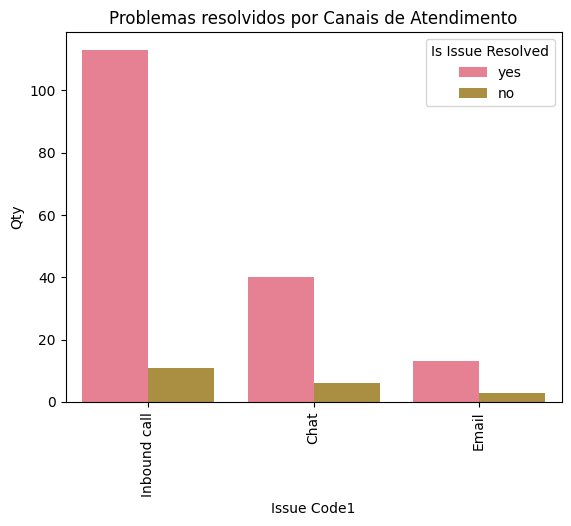

In [188]:
sns.countplot(x='Support Channel', hue='Is Issue Resolved', data=df_merge_naoconvertidos_porserial_refused)
plt.xticks(rotation=90)
plt.xlabel('Issue Code1')
plt.ylabel('Qty')
plt.title('Problemas resolvidos por Canais de Atendimento')

Text(0.5, 1.0, 'Contgem de Problemas Resolvidos')

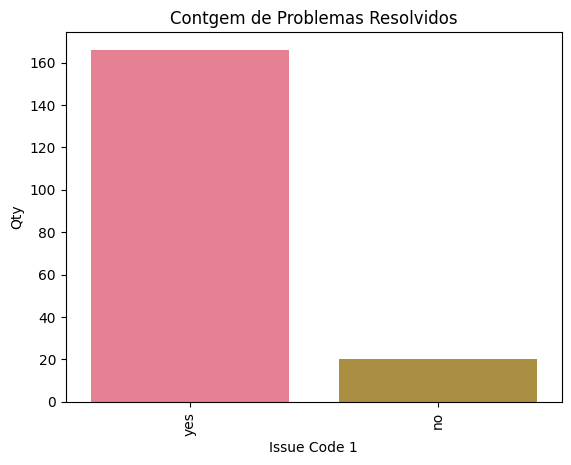

In [189]:
sns.countplot(x='Is Issue Resolved', data=df_merge_naoconvertidos_porserial_refused)
plt.xticks(rotation=90)
plt.xlabel('Issue Code 1')
plt.ylabel('Qty')
plt.title('Contgem de Problemas Resolvidos')

Text(0.5, 1.0, 'Problemas Resolvidos por Tipos de Problemas')

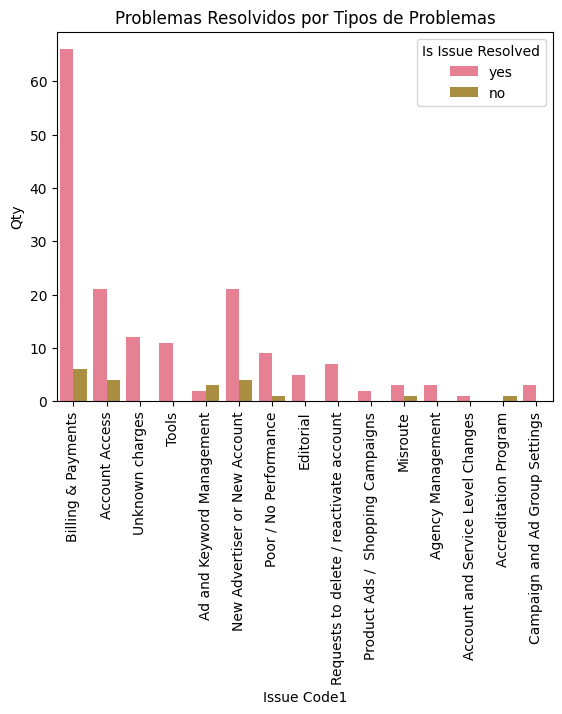

In [192]:
sns.countplot(x='Issue Code 1', hue='Is Issue Resolved', data=df_merge_naoconvertidos_porserial_refused)
plt.xticks(rotation=90)
plt.xlabel('Issue Code1')
plt.ylabel('Qty')
plt.title('Problemas Resolvidos por Tipos de Problemas')

##### Fiz granularidade dos dados que possuem "Don't know/refused" na coluna "Product Quality" para tentar ver se há algum padrão, porem os dados seguem a mesma proporcionalidade do dataset cheio dos não convertidos.

In [194]:
requests_data_false.to_excel('base_naoconvertidos.xlsx', index=False)

In [195]:
df_merge_naoconvertidos_porserial.to_excel('naoconvertidos_merged.xlsx', index=False)